In [1]:
# Set environment variable to handle OpenMP runtime conflict
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Also set this for the current session
if os.name == 'nt':  # Windows
    try:
        import ctypes
        ctypes.CDLL('mkl_rt.dll')
    except:
        pass

In [33]:
import importlib
import ukko.survival
importlib.reload(ukko.survival)

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter, LogLogisticAFTFitter, KaplanMeierFitter

# Import ukko survival functions
from ukko.survival import plot_KM, plot_loglogistic_hazard, generate_survival_data_LL

effective_scale linear [12.36572401 19.17628586 19.64243741 12.61046962 11.08976952  7.86332364
  6.78292449  9.07993112  7.92374229 11.74226267  7.73192505  6.36247724
 10.93395914 10.8780011   9.51763034  7.35113341 11.58232893  8.48214973
 15.53869492  8.76177063  8.14773504  5.9967127   9.69684958  7.58975202
  9.84801194 14.20998948 10.40006927 11.64933762  7.07775833 11.50894901
 10.42373446  8.69293656 11.34951889  9.04579501  8.63717858 11.88545347
 11.16391697  9.88729416  9.21056811  6.06770108 14.02369163  5.4920371
  6.54783647  8.06352833  6.34999742 19.39811689 14.15914244 17.48570189
 11.17505399  5.68650061 11.1302854  11.04383817 22.20231149 13.24022037
 16.40982392 11.9298937   9.00412344  7.05565473 11.25563991 18.61495389
 13.06654882 12.29066664 12.24224075  5.23304761 10.95843338 11.79064909
 10.25196191 12.70910018  5.54910594 12.45630075 12.76412568 13.21103291
  7.18650768 10.35620615 13.40943605 15.92845635  7.36541616 10.96951755
 25.00592539 10.82971326  7.1

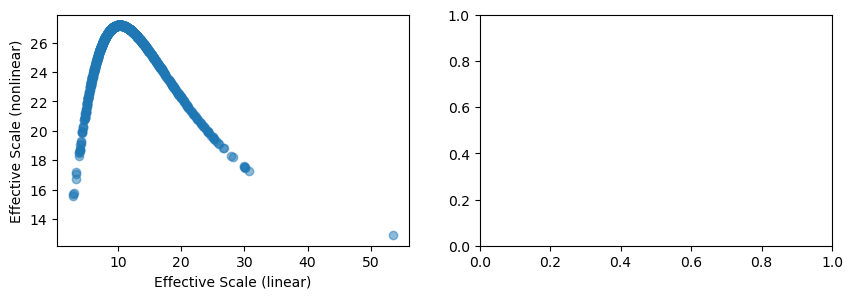

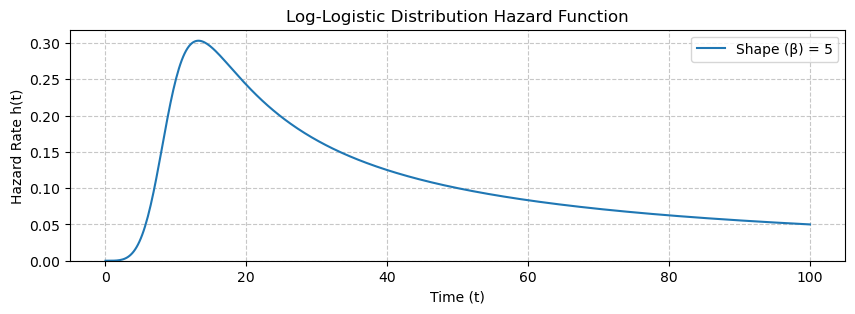


Log-Logistic AFT Survival Data Head:
   feature_0  feature_1  feature_2  survival_time  event_observed  \
0   0.496714  -0.138264   0.647689      60.539544               0   
1   1.523030  -0.234153  -0.234137      18.435949               1   
2   1.579213   0.767435  -0.469474      44.909441               0   

   observed_time  
0      50.000000  
1      18.435949  
2      44.909441  

Actual censoring: 0.32


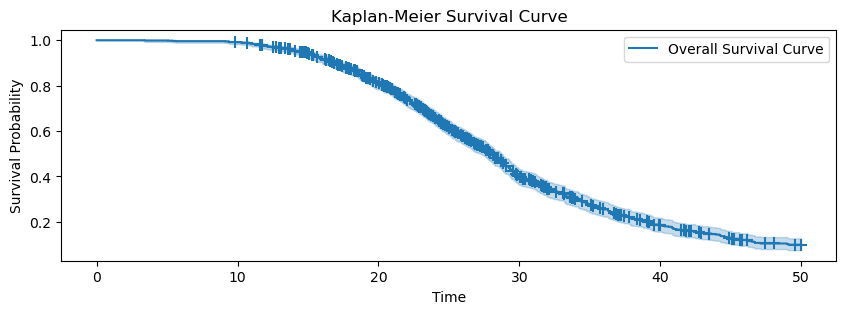


Cox PH Model Summary:


<lifelines.CoxPHFitter: fitted with 1000 total observations, 323 right-censored observations>
             duration col = 'observed_time'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 677
   partial log-likelihood = -4085.06
         time fit was run = 2025-06-03 10:11:41 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
feature_0  0.04      1.04      0.05           -0.05            0.14                0.95                1.14
feature_1  0.05      1.05      0.04           -0.03            0.12                0.97                1.13
feature_2  0.01      1.01      0.04           -0.07            0.09                0.93                1.09

           cmp to    z    p  -log2(p)
covariate                            
feature_0    0.00 0.92 0.36      1.48
feature_1    0.00 1.27 0.20      2.30
feature_2    0.00 0.18 0.86      0.22
---
Concordance = 0.53
Partial AIC = 8176.12
log-likelihood ratio test = 2.44 on 3 df
-log2(p) of ll-ratio test = 1.04

['feature_0', 'feature_1', 'feature_2']
covariate
feature_2    0.000000
feature_0    0.427496
feature_1    0.000000
dtype: float64


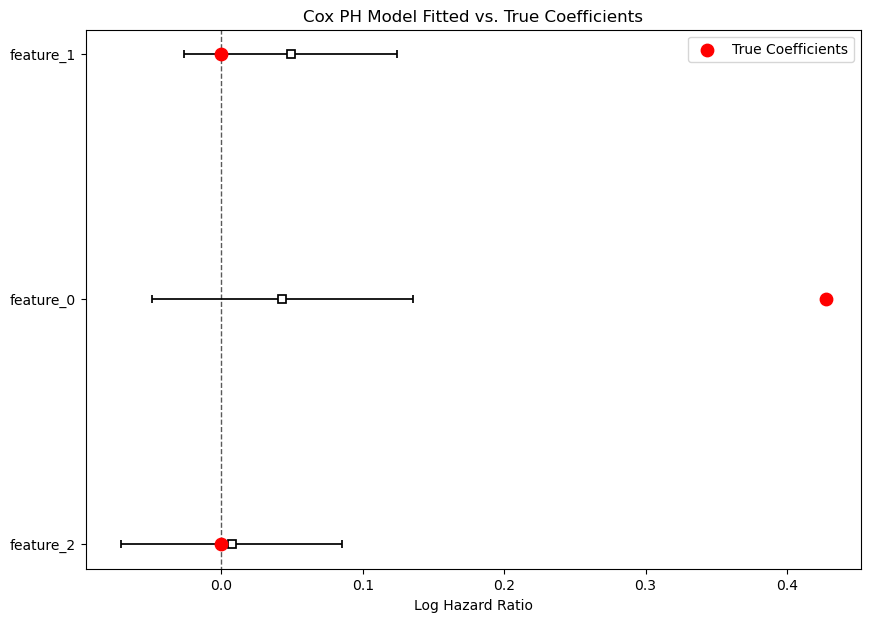


AFT Log-logistic Model Summary:


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 323 right-censored observations>
             duration col = 'observed_time'
                event col = 'event_observed'
   number of observations = 1000
number of events observed = 677
           log-likelihood = -2716.66
         time fit was run = 2025-06-03 10:11:41 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                  
alpha_ feature_0 -0.02      0.98      0.01           -0.05            0.01                0.95                1.01
       feature_1 -0.02      0.98      0.01           -0.05            0.00                0.95                1.00
       feature_2  0.00      1.00      0.01           -0.02            0.03                0.98                1.03
       Intercept  3.33     28.02      0.01            3.31            3.36               27.27               28.78
beta_  Intercept  1.46      4.29      0.03            1.39            1.52                4.03                4.56

                  cmp to      z      p  -log2(p)
param  covariate                                
alpha_ feature_0    0.00  -1.54   0.12      3.03
       feature_1    0.00  -1.70   0.09      3.50
       feature_2    0.00   0.33   0.74      0.43
       Intercept    0.00 241.35 <0.005       inf
beta_  Intercept    0.00  46.08 <0.005       inf
---
Concordance = 0.53
AIC = 5443.31
log-likelihood ratio test = 5.14 on 3 df
-log2(p) of ll-ratio test = 2.63

['feature_0: alpha_', 'feature_1: alpha_', 'feature_2: alpha_']
feature_1: alpha_    0.000000
feature_0: alpha_    0.427496
feature_2: alpha_    0.000000
Intercept: beta_          NaN
Intercept: alpha_         NaN
dtype: float64


<Figure size 1000x700 with 0 Axes>

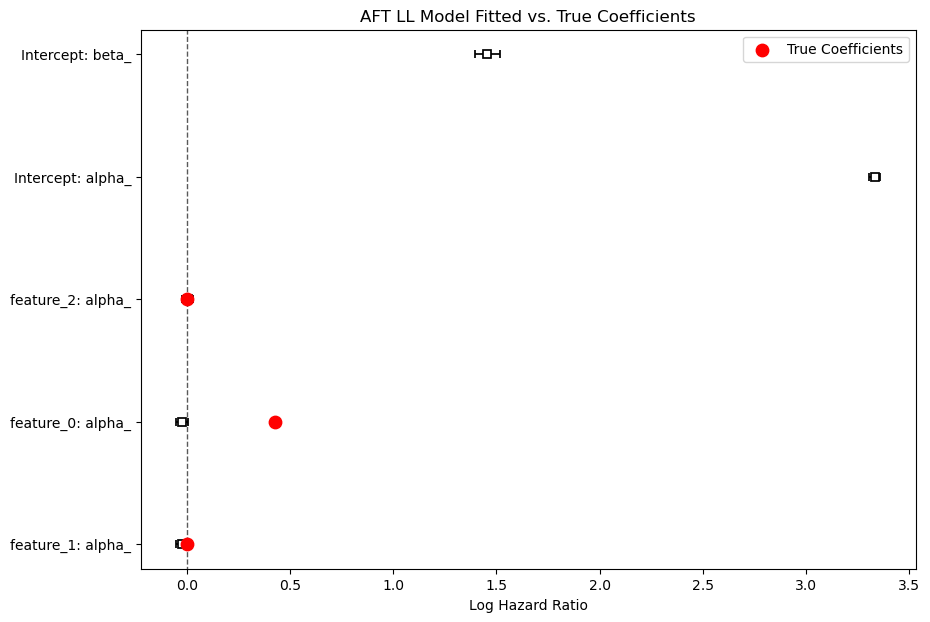

Highest Risk (Q1) size: 218
Q2 size: 204
Q3 size: 191
Q4 size: 199
Lowest Risk (Q5) size: 188


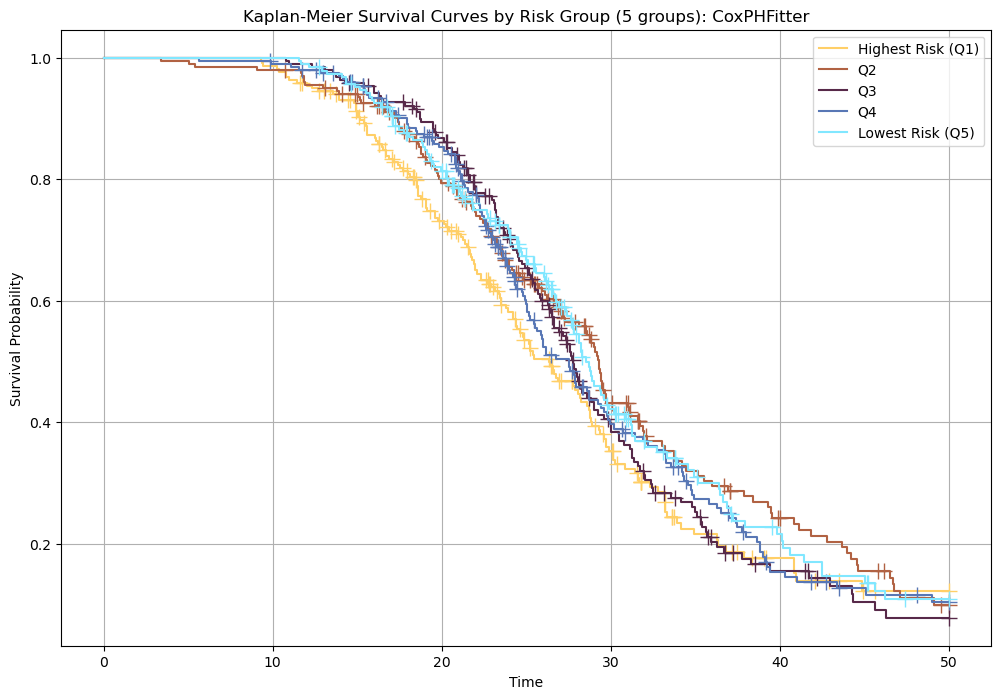

In [ ]:
def generate_data(n_samples=1000, n_features=3, n_informative=1, 
                 shape=5, scale=10.0, censoring=0.3, random_seed=42):
    """Generate synthetic survival data with log-logistic distribution."""
    np.random.seed(random_seed)
    
    survival_data, true_coefficients = generate_survival_data_LL(
        n_samples, n_features, n_informative,
        shape, scale, censoring,
        nonlinear=False
    )
    feature_cols = [col for col in survival_data.columns if col.startswith('feature_')]
    cox_data = survival_data[feature_cols + ['observed_time', 'event_observed']]
    
    return survival_data, cox_data, true_coefficients, feature_cols

def fit_cox_model(cox_data):
    """Fit Cox proportional hazards model to survival data."""
    
    cph = CoxPHFitter()
    cph.fit(cox_data, duration_col='observed_time', event_col='event_observed')
    return cph

def plot_coefficient_comparison(model, true_coefficients, title):
    """Plot comparison between fitted and true coefficients."""
    plt.figure(figsize=(10, 7))
    ax = model.plot()
    
    
    #If model = coxph:
    feature_names = [f'feature_{i}' for i in range(len(true_coefficients))]
    model_params = model.params_.copy()  # Create a copy to avoid modifying original (for aft)
    xlabel = 'Log Hazard Ratio'

    if model._class_name == 'LogLogisticAFTFitter':
      # Update index for AFT model parameters
      new_index = [f"{cov}: {param}" if cov else param 
                  for param, cov in model.params_.index]
      model_params.index = new_index

      feature_names = [f'feature_{i}: alpha_' for i in range(len(true_coefficients))]
      #true_coef_series = pd.Series(true_coefficients, index=feature_names)
      #ordered_true_coef = true_coef_series.reindex(aftll_params.sort_values().index)

    print(feature_names)
    true_coef_series = pd.Series(true_coefficients, index=feature_names)
    ordered_true_coef = true_coef_series.reindex(model_params.sort_values().index)
    print(ordered_true_coef)

    ax.scatter(ordered_true_coef.values, range(len(ordered_true_coef)), 
              color='red', marker='o', s=80, zorder=5, label='True Coefficients')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()
    
    return ordered_true_coef

def fit_aft_model(cox_data):
    """Fit AFT log-logistic model and plot results."""
    aftll = LogLogisticAFTFitter()
    aftll.fit(cox_data, duration_col='observed_time', event_col='event_observed')
        
    # Plot comparison
    plt.figure(figsize=(10, 7))
    #ax = aftll.plot()
    
    return aftll #, ordered_true_coef

def stratify_and_plot(survival_data, model, feature_cols, n_groups=4):
    """Stratify patients into multiple risk groups and plot KM curves."""
    # Predict survival and stratify
    predicted_survival = model.predict_median(survival_data[feature_cols])
    survival_data['predicted_median_survival'] = predicted_survival
    
    # Calculate quantile cutoffs
    quantiles = np.linspace(0, 1, n_groups + 1)
    cutoffs = np.quantile(survival_data['predicted_median_survival'], quantiles)
    
    # Plot KM curves
    plt.figure(figsize=(12, 8))
    
    # Create color map for groups
    colors = plt.cm.managua(np.linspace(0, 1, n_groups))
    
    for i in range(n_groups):
        if i == 0:
            mask = survival_data['predicted_median_survival'] <= cutoffs[1]
            group_label = f'Highest Risk (Q1)'
        elif i == n_groups - 1:
            mask = survival_data['predicted_median_survival'] > cutoffs[-2]
            group_label = f'Lowest Risk (Q{n_groups})'
        else:
            mask = (survival_data['predicted_median_survival'] > cutoffs[i]) & \
                   (survival_data['predicted_median_survival'] <= cutoffs[i+1])
            group_label = f'Q{i+1}'
        
        group = survival_data[mask]
        
        kmf = KaplanMeierFitter()
        kmf.fit(durations=group['observed_time'],
                event_observed=group['event_observed'],
                label=group_label)
        kmf.plot_survival_function(show_censors=True, ci_show=False, color=colors[i])
        
        print(f"{group_label} size: {len(group)}")
    
    plt.title(f'Kaplan-Meier Survival Curves by Risk Group ({n_groups} groups): {model._class_name}')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return cutoffs

def main():
    # Generate synthetic data
    survival_data, cox_data, true_coefficients, feature_cols = generate_data()
    
    # Plot hazard function
    plot_loglogistic_hazard([5], scale=10.0, max_time=100)
    
    # Show data summary
    print("\nLog-Logistic AFT Survival Data Head:")
    print(survival_data.head(3))
    #print("\nDescriptive Statistics:")
    #print(survival_data['observed_time'].describe())
    print(f"\nActual censoring: {1 - survival_data['event_observed'].mean():.2f}")
    
    # Plot KM curve
    plot_KM(survival_data)
    
    # Fit and evaluate models
    cph = fit_cox_model(cox_data)
    print("\nCox PH Model Summary:")
    cph.print_summary()
    
    ordered_true_coef_cox = plot_coefficient_comparison(
        cph, true_coefficients, 
        'Cox PH Model Fitted vs. True Coefficients'
    )
    
    aftll = fit_aft_model(cox_data)
    print("\nAFT Log-logistic Model Summary:")
    aftll.print_summary()

    ordered_true_coef_aftll = plot_coefficient_comparison(
        aftll, true_coefficients, 
        'AFT LL Model Fitted vs. True Coefficients' 
    )
    
    # Stratify and plot risk groups
    cutoffs = stratify_and_plot(survival_data, cph, feature_cols, n_groups=5)

if __name__ == "__main__":
    main()